In [2]:
!pip install pubchempy

  Stored in directory: /home/dsxuser/.cache/pip/wheels/10/4d/51/6b843681a9a5aef35f0d0fbce243de46f85080036e16118752
Successfully built pubchempy


In [40]:
import pubchempy as pcp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from PIL import Image
import itertools
import pickle
import PIL 
from PIL import Image
from IPython.display import display
from PIL import ImageDraw,ImageFont
%matplotlib inline

#save data as csv

In [42]:
cid_dict={
    #alkane
    6324:'ethane',
    8058:'hexane',
    #branched alkane
    11269:'2,3,4-trimethylpentane',
    6360:'2-methylpropane',
    #alkene
    6325:'ethene',
    7845:'1,3-butadiene',
    #alkyne
    6335:'Propyne',
    13568:'3-hexyne',
    #benzene & derivatives
    241:'benzene',
    931:'Naphthalene',
    7929:'M-Xylene',
    6115:'Aniline',
    996:'Phenol',
    243:'Benzoic acid',
    240:'Benzaldehyde',
    #10390:'diphenylacetylene'
    #alcohol
    887:'Methanol',
    6386:'tert-Butyl alcohol',
    #ketone
    6569:'Methyl ethyl ketone',
    #aldehyde
    177:'Acetaldehyde',
    #acid
    176:'Acetic acid',
    #ether
    3283:'Diethyl ether',
    #amines
    6329:'Methylamine',
    674:'Dimethylamine',
    1146:'Trimethylamine',
    140746:'Ethanimine',
    222:'ammonia',
    #cynate
    137201:'Methylcyanate',
    12228:'Methyl isocyanate',
    11646:'Methyl isocyanide',
    #random
    135504501:'rand_1',
    #O-O bonds:
    6410:'Tert-butyl hydroperoxide',
    784:'Hydrogen peroxide',
    8033:'Di-tert-butyl peroxide',
    24823:'ozone',
    #N-N-N bonds:
    69319:'Azidobenzene',
    33558:'Azide ion',
    #N-O bonds:
    8053:'3-Methylbutyl nitrite',
    6375:'Nitromethane',
    11473:'Nitrosobenzene',
    67180:'Acetone oxime',
    24529:'Nitrous acid',
    #C-F/H-F bonds:
    11638:'Fluoromethane',
    14917:'Hydrofluoric acid',
    6393:'Carbon tetrafluoride',
    127602:'Acetyl hypofluorite',
    552549:'(Trifluoromethyl)trimethylsilane',
    5206:'Sevoflurane',
    #F-O
    24547:'Oxygen difluoride',
    123257:'Fluorine dioxide',

}

In [29]:
compounds_dict={}
def get_df(cid,name='compound'):
  print('{}:\tAccessing Properties & creating dataframe...'.format(name))
  if cid not in compounds_dict.keys():
    comp=pcp.Compound.from_cid(cid,record_type='3d')
    compounds_dict[cid]=comp
  else:
    comp=compounds_dict[cid]
  aids=[]
  atoms_ele={}
  atoms_x={}
  atoms_y={}
  atoms_z={}
  atoms_charge={}
  for atom in comp.atoms:
    aid=atom.aid
    aids.append(aid)
    atoms_ele[aid]=atom.element
    atoms_x[aid]=atom.x
    atoms_y[aid]=atom.y
    atoms_z[aid]=atom.z
    atoms_charge[aid]=atom.charge
  pairs=list(itertools.product(aids,repeat=2))
  pairs=list(filter(lambda x:x[0]!=x[1],pairs))
  df=pd.DataFrame()
  df['cid']=[cid]*len(pairs)
  df['aid1']=list(map(lambda x:x[0],pairs))
  df['aid2']=list(map(lambda x:x[1],pairs))
  df['atom1']=df['aid1'].map(atoms_ele)
  df['atom2']=df['aid2'].map(atoms_ele)
  df['x_1']=df['aid1'].map(atoms_x)
  df['y_1']=df['aid1'].map(atoms_y)
  df['z_1']=df['aid1'].map(atoms_z)
  df['x_2']=df['aid2'].map(atoms_x)
  df['y_2']=df['aid2'].map(atoms_y)
  df['z_2']=df['aid2'].map(atoms_z)
  df['atom1_charge']=df['aid1'].map(atoms_charge)
  df['atom2_charge']=df['aid2'].map(atoms_charge)
  df['bond']=0
  for bond in comp.bonds:
    df.loc[(df['aid1']==bond.aid1) & (df['aid2']==bond.aid2),'bond']=1

  #sanity check
  assert df[df['bond']==1].shape[0]==len(comp.bonds),'Number of bonds in df: {}\nNumber of bonds in compound:{}'.format(df[df['bond']==1].shape[0],len(comp.bonds))
  return df

In [43]:
df_dict={}
for cid,name in cid_dict.items():
    df_dict[name]=get_df(cid,name=name)
#concatenating dataframe
data=pd.concat(df_dict.values(),ignore_index=True)
data.head()

ethane:	Accessing Properties & creating dataframe...
hexane:	Accessing Properties & creating dataframe...
2,3,4-trimethylpentane:	Accessing Properties & creating dataframe...
2-methylpropane:	Accessing Properties & creating dataframe...
ethene:	Accessing Properties & creating dataframe...
1,3-butadiene:	Accessing Properties & creating dataframe...
Propyne:	Accessing Properties & creating dataframe...
3-hexyne:	Accessing Properties & creating dataframe...
benzene:	Accessing Properties & creating dataframe...
Naphthalene:	Accessing Properties & creating dataframe...
M-Xylene:	Accessing Properties & creating dataframe...
Aniline:	Accessing Properties & creating dataframe...
Phenol:	Accessing Properties & creating dataframe...
Benzoic acid:	Accessing Properties & creating dataframe...
Benzaldehyde:	Accessing Properties & creating dataframe...
Methanol:	Accessing Properties & creating dataframe...
tert-Butyl alcohol:	Accessing Properties & creating dataframe...
Methyl ethyl ketone:	Accessin

,cid,aid1,aid2,atom1,atom2,x_1,y_1,z_1,x_2,y_2,z_2,atom1_charge,atom2_charge,bond
0,6324,1,2,C,C,-0.756,0.0,0.0,0.7560,0.0000,0.0000,0,0,1
1,6324,1,3,C,H,-0.756,0.0,0.0,-1.1404,0.6586,0.7845,0,0,1
2,6324,1,4,C,H,-0.756,0.0,0.0,-1.1404,0.3501,-0.9626,0,0,1
3,6324,1,5,C,H,-0.756,0.0,0.0,-1.1405,-1.0087,0.1781,0,0,1
4,6324,1,6,C,H,-0.756,0.0,0.0,1.1404,-0.3501,0.9626,0,0,0


In [35]:
data.shape

(8824, 14)

In [34]:
print('Compound in cid_dict: '+str(len(df_dict.keys())))
print('Downloaded Compounds: '+str(len(compounds_dict)))

Compound in cid_dict: 45
Downloaded Compounds: 45


## Unique atoms in the data

In [36]:
data['atom1'].unique()

array(['C', 'H', 'N', 'O', 'F', 'Si'], dtype=object)

In [ ]:
#get access to font stored online
#!wget https://github.com/ss-ghule/misc_or_test_repo/blob/master/BASKVILL.TTF
#!ls
#!chmod 600 .*TTF

In [37]:
def process_img(img,caption):
  draw=ImageDraw.Draw(img)
  w=img.width
  h=img.height
  draw.rectangle([0,0,w,h],fill=None,outline='black',width=2)
  #font = ImageFont.truetype("BASKVILL.TTF", 20)
  draw.text((0.3*w,0.9*h),caption,fill='black')#,font=font)

In [38]:
def display_molecules(cid_dict):
  for cid,name in cid_dict.items():
    pcp.download('png',str(cid)+'.png',cid,image_size='large',record_type='3d',overwrite=True)
  ref_cid=list(cid_dict.keys())[0]
  ref_img=Image.open(str(ref_cid)+'.png')
  col=10
  row=int(len(cid_dict)//10 + 1)
  contact_sheet=Image.new(ref_img.mode,(ref_img.width*col,ref_img.height*row))
  x=0
  y=0
  for i,cid in enumerate(cid_dict.keys()):
    img=Image.open(str(cid)+'.png')
    process_img(img,cid_dict[cid])
    contact_sheet.paste(img,(x,y))
    if (i+1)%10==0:
      x=0
      y+=ref_img.height
    else:
      x+=ref_img.width
  contact_sheet=contact_sheet.resize((1000,row*100))
  display(contact_sheet)
  #return contact_sheet

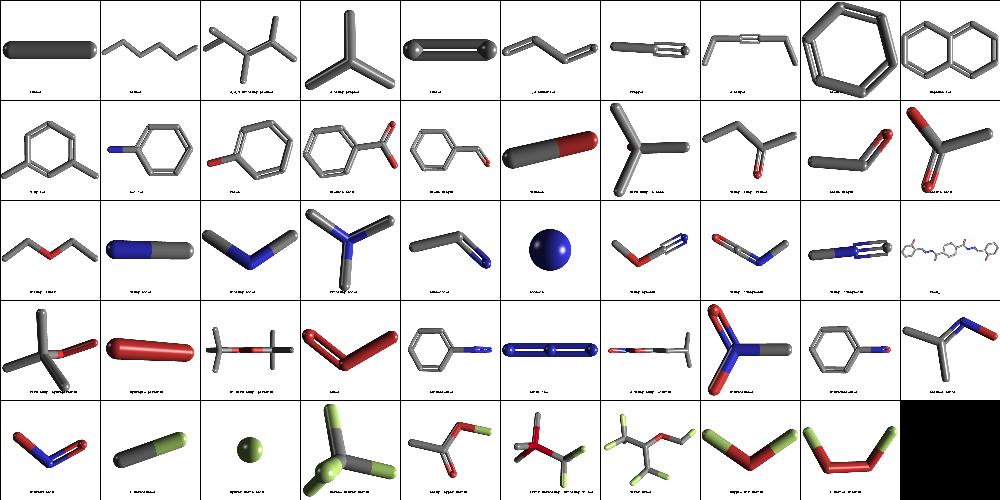

In [44]:
display_molecules(cid_dict)

# Serialize the data

In [45]:
data.to_csv('data_raw.csv',index=False)

In [46]:
!ls

11269.png   135504501.png  240.png    5206.png	  6375.png   7845.png  996.png
1146.png    13568.png	   241.png    552549.png  6386.png   784.png   data.csv
11473.png   137201.png	   243.png    6115.png	  6393.png   7929.png
11638.png   140746.png	   24529.png  6324.png	  6410.png   8033.png
11646.png   14917.png	   24547.png  6325.png	  6569.png   8053.png
12228.png   176.png	   24823.png  6329.png	  67180.png  8058.png
123257.png  177.png	   3283.png   6335.png	  674.png    887.png
127602.png  222.png	   33558.png  6360.png	  69319.png  931.png


In [49]:
!head -5 data.csv

cid,aid1,aid2,atom1,atom2,x_1,y_1,z_1,x_2,y_2,z_2,atom1_charge,atom2_charge,bond
6324,1,2,C,C,-0.756,0.0,0.0,0.756,0.0,0.0,0,0,1
6324,1,3,C,H,-0.756,0.0,0.0,-1.1404,0.6586,0.7845,0,0,1
6324,1,4,C,H,-0.756,0.0,0.0,-1.1404,0.3501,-0.9626,0,0,1
6324,1,5,C,H,-0.756,0.0,0.0,-1.1405,-1.0087,0.1781,0,0,1


In [50]:
test_data=pd.read_csv('data_raw.csv')

In [51]:
test_data.head()

,cid,aid1,aid2,atom1,atom2,x_1,y_1,z_1,x_2,y_2,z_2,atom1_charge,atom2_charge,bond
0,6324,1,2,C,C,-0.756,0.0,0.0,0.7560,0.0000,0.0000,0,0,1
1,6324,1,3,C,H,-0.756,0.0,0.0,-1.1404,0.6586,0.7845,0,0,1
2,6324,1,4,C,H,-0.756,0.0,0.0,-1.1404,0.3501,-0.9626,0,0,1
3,6324,1,5,C,H,-0.756,0.0,0.0,-1.1405,-1.0087,0.1781,0,0,1
4,6324,1,6,C,H,-0.756,0.0,0.0,1.1404,-0.3501,0.9626,0,0,0


In [52]:
data.head()

,cid,aid1,aid2,atom1,atom2,x_1,y_1,z_1,x_2,y_2,z_2,atom1_charge,atom2_charge,bond
0,6324,1,2,C,C,-0.756,0.0,0.0,0.7560,0.0000,0.0000,0,0,1
1,6324,1,3,C,H,-0.756,0.0,0.0,-1.1404,0.6586,0.7845,0,0,1
2,6324,1,4,C,H,-0.756,0.0,0.0,-1.1404,0.3501,-0.9626,0,0,1
3,6324,1,5,C,H,-0.756,0.0,0.0,-1.1405,-1.0087,0.1781,0,0,1
4,6324,1,6,C,H,-0.756,0.0,0.0,1.1404,-0.3501,0.9626,0,0,0


In [53]:
test_data.shape

(9058, 14)

In [54]:
data.shape

(9058, 14)

# Upload data to IBM object store

In [55]:
!ls

11269.png   135504501.png  240.png    5206.png	  6375.png   7845.png  996.png
1146.png    13568.png	   241.png    552549.png  6386.png   784.png   data.csv
11473.png   137201.png	   243.png    6115.png	  6393.png   7929.png
11638.png   140746.png	   24529.png  6324.png	  6410.png   8033.png
11646.png   14917.png	   24547.png  6325.png	  6569.png   8053.png
12228.png   176.png	   24823.png  6329.png	  67180.png  8058.png
123257.png  177.png	   3283.png   6335.png	  674.png    887.png
127602.png  222.png	   33558.png  6360.png	  69319.png  931.png


In [5]:
# The code was removed by Watson Studio for sharing.

In [56]:
upload_file_cos(credentials_1,'data_raw.csv','data_raw.csv')

File Uploaded
